In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# CARREGANDO DADOS

In [2]:
dados = pd.read_csv("cardio.csv", sep=';')
dados

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


# ANALISE DOS DADOS

In [3]:
dados.dtypes

id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

In [4]:
dados.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [5]:
dados.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


# SEPARADO OS DADOS PREVISORES E CLASSE

In [6]:
data = dados.iloc[:, 1:]
X = data.iloc[:, :-1]
y = data.iloc[:, -1:]
X

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,18393,2,168,62.0,110,80,1,1,0,0,1
1,20228,1,156,85.0,140,90,3,1,0,0,1
2,18857,1,165,64.0,130,70,3,1,0,0,0
3,17623,2,169,82.0,150,100,1,1,0,0,1
4,17474,1,156,56.0,100,60,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,2,168,76.0,120,80,1,1,1,0,1
69996,22601,1,158,126.0,140,90,2,2,0,0,1
69997,19066,2,183,105.0,180,90,3,1,0,1,0
69998,22431,1,163,72.0,135,80,1,2,0,0,0


# SEPARANDO DADOS DE TREINO E TESTE

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)
X_train

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
30913,19942,2,171,75.0,130,80,1,1,0,0,0
37518,19583,2,161,62.0,130,90,3,1,0,0,1
17929,19616,1,170,65.0,12,80,1,1,0,0,0
51688,17562,2,174,100.0,125,80,1,1,1,0,1
31600,21913,1,164,73.0,130,80,1,3,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
23727,16153,1,166,70.0,120,80,1,1,0,0,1
23554,18120,1,154,52.0,140,80,1,1,0,0,1
53909,23264,1,151,56.0,110,70,3,1,0,0,1
41071,23253,2,170,70.0,120,80,1,1,0,0,1


# AJUSTANDO O INTERVALO DOS DADOS

In [8]:
sc = StandardScaler()
sc.fit(X_train)

X_train = sc.transform(X_train.values)
X_test = sc.transform(X_test.values)
X_train

c:\Users\GABRIEL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\GABRIEL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[ 0.19295566,  1.36478618,  0.80643757, ..., -0.31189718,
        -0.23884073, -2.02319202],
       [ 0.04742926,  1.36478618, -0.4115358 , ..., -0.31189718,
        -0.23884073,  0.49426846],
       [ 0.06080633, -0.73271551,  0.68464023, ..., -0.31189718,
        -0.23884073, -2.02319202],
       ...,
       [ 1.53958159, -0.73271551, -1.62950917, ..., -0.31189718,
        -0.23884073,  0.49426846],
       [ 1.53512256,  1.36478618,  0.68464023, ..., -0.31189718,
        -0.23884073,  0.49426846],
       [ 0.07134585,  1.36478618,  1.17182958, ..., -0.31189718,
        -0.23884073,  0.49426846]])

# CRIANDO MODELO E TREINANDO

In [9]:
modelo = Perceptron(max_iter=1000, eta0=0.1, random_state=0)
modelo.fit(X_train, y_train.values.ravel())

Perceptron(eta0=0.1)

In [10]:
y_pred = modelo.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[2193 3147]
 [1437 3723]]
0.5634285714285714


# PERCEPTRON MULTICAMADAS

In [11]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# CRIANDO ARQUETETURA DO MODELO

In [12]:
modelo = keras.Sequential()
modelo.add(layers.Dense(6, activation='relu'))
modelo.add(layers.Dense(1, activation='sigmoid'))

# optimizer: ajustar pesos da rede durante o treinamento.
# loss: calcular o erro entre as previsões do modelo e os rótulos verdadeiros.
# metrics: Lmétricas usadas para avaliar o desempenho.
modelo.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# TREINANDO MODELO

In [13]:
# batch_size: Tamanho do lote de dados usado nas iteração do treinamento.
# epochs: iterações completas pelos dados de treinamento
historico = modelo.fit(X_train, y_train, batch_size=128, epochs=100)

Epoch 1/100


465/465 [==============================] - 7s 5ms/step - loss: 0.6544 - accuracy: 0.6320
Epoch 2/100
465/465 [==============================] - 3s 6ms/step - loss: 0.6206 - accuracy: 0.6620
Epoch 3/100
465/465 [==============================] - 2s 5ms/step - loss: 0.6114 - accuracy: 0.6728
Epoch 4/100
465/465 [==============================] - 3s 5ms/step - loss: 0.6030 - accuracy: 0.6834
Epoch 5/100
465/465 [==============================] - 3s 6ms/step - loss: 0.5948 - accuracy: 0.6949
Epoch 6/100
465/465 [==============================] - 3s 5ms/step - loss: 0.5872 - accuracy: 0.7056
Epoch 7/100
465/465 [==============================] - 3s 6ms/step - loss: 0.5809 - accuracy: 0.7142
Epoch 8/100
465/465 [==============================] - 2s 5ms/step - loss: 0.5757 - accuracy: 0.7210
Epoch 9/100
465/465 [==============================] - 3s 5ms/step - loss: 0.5721 - accuracy: 0.7249
Epoch 10/100
465/465 [==============================] - 3s 6ms/step - loss: 0.5698 - accu

# ANALISANDO EVOLUÇÃO TREINAMENTO

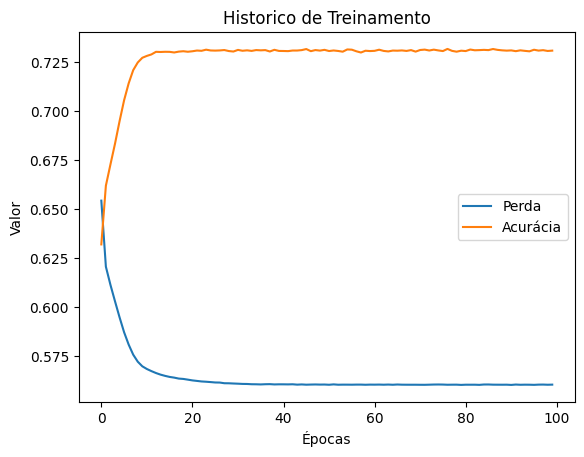

In [14]:
historico.history.keys()
plt.plot(historico.history['loss'], label='Perda')
plt.plot(historico.history['accuracy'], label='Acurácia')

plt.xlabel('Épocas')
plt.ylabel('Valor')
plt.title('Historico de Treinamento')

plt.legend()
plt.show()

# ANALISE DOS RESULTADOS

In [15]:
y_pred = modelo.predict(X_test)
y_pred = (y_pred > 0.5)
y_pred

329/329 [==============================] - 3s 6ms/step


array([[False],
       [ True],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [16]:
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[4099 1241]
 [1578 3582]]
0.7315238095238096
